# KNN

In [19]:
from sklearn import preprocessing, cross_validation, neighbors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


%matplotlib inline

In [20]:
df = pd.read_csv('DataSets/breast-cancer-wisconsin.txt')
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [21]:
#switch out missing data
df.replace('?', -99999, inplace = True)

In [22]:
#ID column is of no help
df.drop(['id'], 1, inplace = True)

In [23]:
#X = training data
X = np.array(df.drop(['class'],1))
#y = testing data
y = np.array(df['class'])

In [24]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.2)

In [42]:
k_range = range(1,20)
scores = []
for k in k_range:
    clf = neighbors.KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print(scores)

[0.95, 0.9357142857142857, 0.9785714285714285, 0.9714285714285714, 0.9785714285714285, 0.9714285714285714, 0.9785714285714285, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714]


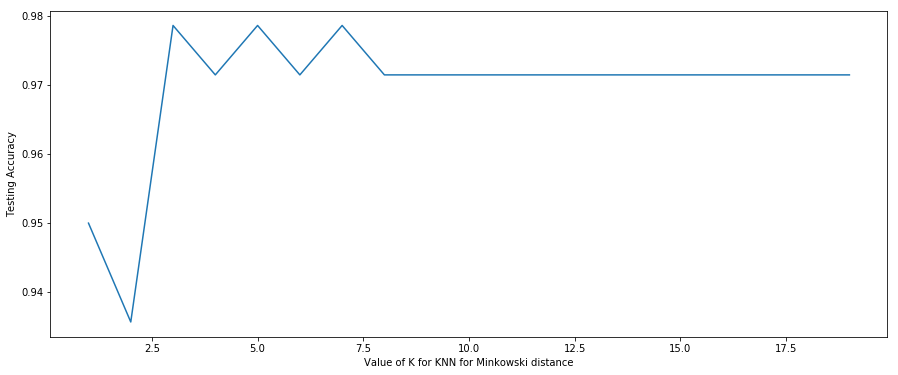

In [43]:
fig, ax = plt.subplots(figsize =(15,6))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN for Minkowski distance')
plt.ylabel('Testing Accuracy')
fig.savefig('Minkowski.jpg')

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,20)
scores = []
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors = k, p = 1)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print(scores)

[0.9714285714285714, 0.9357142857142857, 0.9857142857142858, 0.9785714285714285, 0.9857142857142858, 0.9785714285714285, 0.9785714285714285, 0.9714285714285714, 0.9785714285714285, 0.9785714285714285, 0.9785714285714285, 0.9785714285714285, 0.9785714285714285, 0.9785714285714285, 0.9785714285714285, 0.9785714285714285, 0.9785714285714285, 0.9785714285714285, 0.9785714285714285]


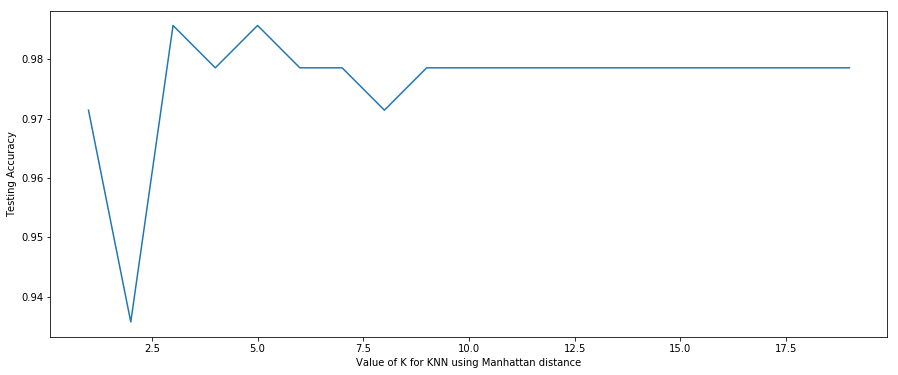

In [45]:
fig, ax = plt.subplots(figsize =(15,6))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN using Manhattan distance')
plt.ylabel('Testing Accuracy')
fig.savefig('Manhattan.jpg')

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,20)
scores = []
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors = k, p = 2)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print(scores)

[0.95, 0.9357142857142857, 0.9785714285714285, 0.9714285714285714, 0.9785714285714285, 0.9714285714285714, 0.9785714285714285, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714]


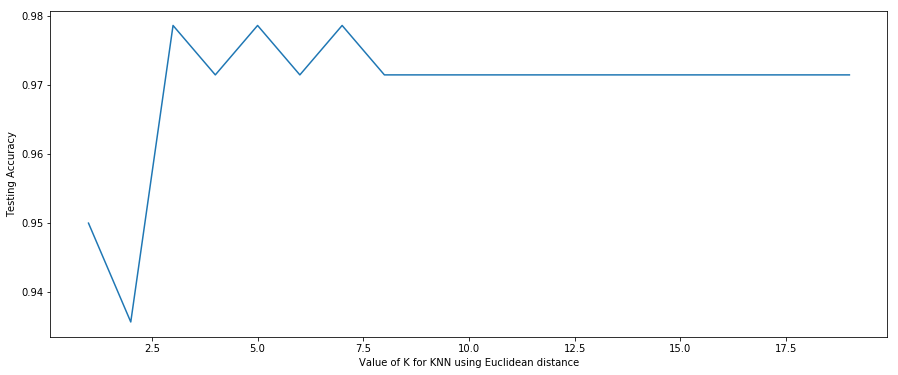

In [47]:
fig, ax = plt.subplots(figsize =(15,6))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN using Euclidean distance')
plt.ylabel('Testing Accuracy')
fig.savefig('Euclidean.jpg')

In [12]:
print(df.columns)

Index(['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion',
       'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli',
       'mitoses', 'class'],
      dtype='object')


In [13]:
#sample test - must be a list of lists
example_measures = np.array([[4,2,1,1,1,2,3,2,1], [8,6,4,3,1,5,3,4,2]])

#1st arg in reshape is for number of test samples
example_measures = example_measures.reshape(len(example_measures),-1)

In [14]:
prediction = clf.predict(example_measures)

In [15]:
#2 for benign, 4 for malignant
print(prediction)

[2 4]
